# Machine Failure Prediction Project
## By Atul Barathe

### Import all the necessary libraries

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

from warnings import filterwarnings
filterwarnings('ignore')

# read the datasets
import pandas as pd

# data preprocessing and data cleaning
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# splitting the data into train and test
from sklearn.model_selection import train_test_split

# load the necessary classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# plotting confusion matrix and generating classification report, import roc curve
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import RocCurveDisplay

## Load the dataset

In [3]:
path = r"D:\Machine-Learning\repository\Classification Project\train.csv"
df = pd.read_csv(path)
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.shape

(136429, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.duplicated().sum()

0

## There are no missing data nor any duplicated information in this dataset

## Separate the data into X and Y features
    Y = >Machine Failure
    0 => machine wont fail
    1 => machine fails

In [8]:
X = df.drop(columns=["id","Machine failure","Product ID"])
Y = df[["Machine failure"]]

In [9]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [10]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing and Data Cleaning

In [11]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [15]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [16]:
pre = ColumnTransformer(
    [
        ("con",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [17]:
pre

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


## Split the data into training and testing

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=42)

In [20]:
xtrain.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
76241,-0.785493,0.114737,0.091316,-0.370333,-0.178362,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
487,-1.376179,-0.968164,0.235475,-0.405618,0.900356,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
34659,1.255061,0.692284,1.403159,-0.864323,0.790921,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
46441,0.556977,0.692284,-0.766427,0.158942,0.900356,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
54811,1.684651,1.991765,0.776070,-0.358571,-0.100194,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [21]:
xtest.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,0.0,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [22]:
ytrain.head()

,Machine failure
76241,0
487,0
34659,0
46441,0
54811,0


In [23]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [24]:
df.shape

(136429, 14)

In [25]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [26]:
def evaluate_model_performance(model,xtrain,ytrain,xtest,ytest):
    # Fit the model
    model.fit(xtrain,ytrain)

    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculate f1-score metric for the model
    f1_data_train = f1_score(ytrain,ypred_train,average="macro")
    f1_data_test = f1_score(ytest,ypred_test,average="macro")

    # cross validated scores
    scores = cross_val_score(model,xtrain,ytrain,scoring="f1_macro",cv=5)
    f1_cv = scores.mean()

    # Return the metric scores
    results = {
        "name":type(model).__name__,
        "f1_train":f1_data_train,
        "f1_test":f1_data_test,
        "f1_cv":f1_cv
    }

    return results

In [27]:
def evaluate_models(models,xtrain,ytrain,xtest,ytest):
    res = []
    for model in models:
        r = evaluate_model_performance(model,xtrain,ytrain,xtest,ytest)
        print(r)
        res.append(r)

    # convert the results into a dataframe
    results_df = pd.DataFrame(res)

    # sort the values 
    results_df.sort_values(by="f1_cv",ascending=False,inplace=True)

    return results_df

In [28]:
results_df_op = evaluate_models(models,xtrain.values,ytrain.values,xtest.values,ytest.values)

{'name': 'LogisticRegression', 'f1_train': 0.9312063985414433, 'f1_test': 0.9284918722542967, 'f1_cv': 0.931242140625751}
{'name': 'DecisionTreeClassifier', 'f1_train': 0.997310651506781, 'f1_test': 0.8631683210088572, 'f1_cv': 0.8771812457076786}
{'name': 'RandomForestClassifier', 'f1_train': 0.9970016084857265, 'f1_test': 0.9275680244299709, 'f1_cv': 0.9282735198633837}
{'name': 'GradientBoostingClassifier', 'f1_train': 0.9385919647491839, 'f1_test': 0.9275604866113905, 'f1_cv': 0.9291538048108599}
{'name': 'XGBClassifier', 'f1_train': 0.956187599635353, 'f1_test': 0.9284776386600253, 'f1_cv': 0.9269769451530998}


In [29]:
results_df_op

,name,f1_train,f1_test,f1_cv
0,LogisticRegression,0.931206,0.928492,0.931242
3,GradientBoostingClassifier,0.938592,0.927560,0.929154
2,RandomForestClassifier,0.997002,0.927568,0.928274
4,XGBClassifier,0.956188,0.928478,0.926977
1,DecisionTreeClassifier,0.997311,0.863168,0.877181


## Logistic Regression is resulting in highest cross validated scores.COnsidering this model for final predictions

In [30]:
best_model = LogisticRegression()
best_model.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
best_model.score(xtrain,ytrain)

0.9962080120405391

In [32]:
best_model.score(xtest,ytest)

0.9961006215550604

In [33]:
ypred_test = best_model.predict(xtest)
ypred_test[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
ytest.head(10)

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0
30662,0
81964,0
9989,0
14173,0
107610,0


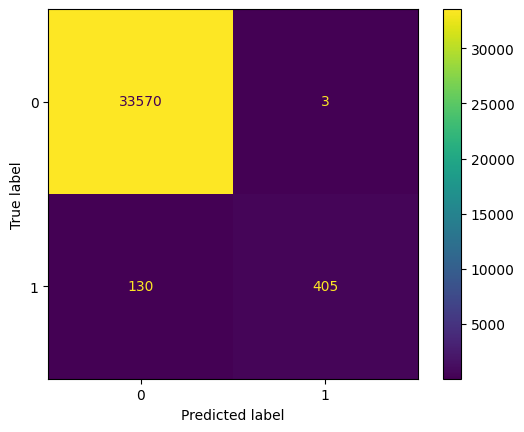

In [35]:
ConfusionMatrixDisplay.from_estimator(best_model,xtest,ytest)

In [36]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33573
           1       0.99      0.76      0.86       535

    accuracy                           1.00     34108
   macro avg       0.99      0.88      0.93     34108
weighted avg       1.00      1.00      1.00     34108



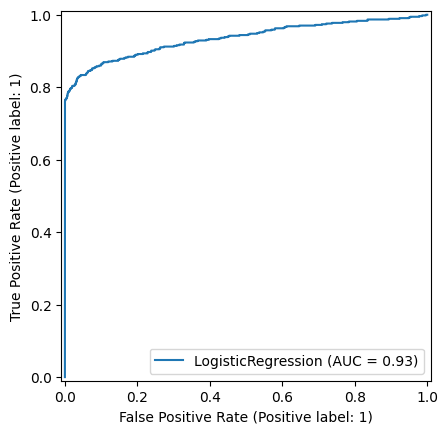

In [37]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

## Perform Out of Sample predictions

In [38]:
path2 = r"D:\Machine-Learning\repository\Classification Project\test.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [39]:
xnew1 = xnew.drop(columns=["id","Product ID"])
xnew1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [40]:
xnew_pre = pre.transform(xnew1)
xnew_pre.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [41]:
final_preds = best_model.predict(xnew_pre)
final_preds[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [42]:
final_probs = best_model.predict_proba(xnew_pre)[:,1]
final_probs[:5]

array([0.00210189, 0.00102736, 0.00261762, 0.00272353, 0.00328935])

In [43]:
submission = xnew[["id"]]

In [44]:
submission.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [45]:
submission["Machine failure preds"] = final_preds
submission["Mechine failure probabilities"] = final_probs.round(3)

In [46]:
submission.head()

,id,Machine failure preds,Mechine failure probabilities
0,136429,0,0.002
1,136430,0,0.001
2,136431,0,0.003
3,136432,0,0.003
4,136433,0,0.003


## save the data into csv files

In [47]:
submission.to_csv("Submission.csv",index=False)